In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [6]:
from google.colab import files
upload = files.upload()

Saving drawndata2.csv to drawndata2.csv


In [7]:
df = pd.read_csv("/content/drawndata1.csv")

In [8]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [76]:
x = df[["x", "y"]].values ### list comprehension
y = df["z"] == "a" ### get the whole column

In [77]:
x

array([[ 5.80803655e+01,  2.25699042e+02],
       [ 2.38867357e+02,  2.47456645e+02],
       [ 1.56218212e+02,  2.86588782e+02],
       [ 2.62004361e+02,  2.84251445e+02],
       [ 1.85243183e+02,  3.08187571e+02],
       [ 1.80095699e+02,  2.89569088e+02],
       [ 2.54567182e+02,  2.88434128e+02],
       [ 2.83587488e+02,  3.05608829e+02],
       [ 1.33750000e+02,  3.11215526e+02],
       [ 4.29660811e+02,  2.65006662e+02],
       [ 3.32910896e+02,  2.61581219e+02],
       [ 3.36778928e+02,  2.56307498e+02],
       [ 1.61129229e+01,  1.91083191e+02],
       [ 2.31967953e+02,  2.08907046e+02],
       [ 2.75937636e+02,  2.20157136e+02],
       [ 4.01967688e+02,  1.82034090e+02],
       [ 3.34785168e+01,  1.75722269e+02],
       [ 1.42187622e+02,  1.88445365e+02],
       [ 2.37558919e+02,  1.77092071e+02],
       [ 1.55172776e+02,  1.78877970e+02],
       [ 4.01681078e+01,  2.17438131e+02],
       [ 1.22382254e+02,  2.21463367e+02],
       [ 4.06950923e+01,  2.36848927e+02],
       [ 1.

In [80]:
x.shape

(252, 2)

In [81]:
y

,z
0,True
1,True
2,True
3,True
4,True
...,...
247,True
248,True
249,True
250,True


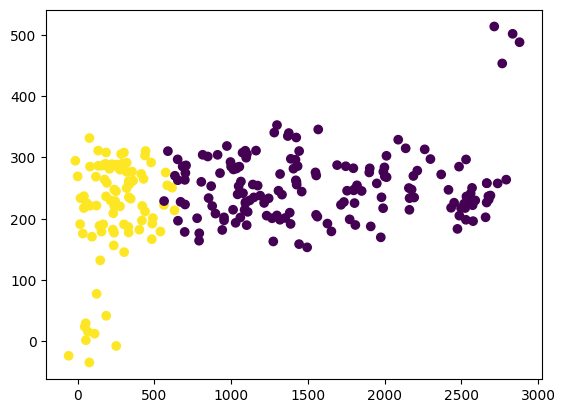

In [82]:
plt.scatter(x[:,0], x[:, 1], c=y)

In [90]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
# Apply quantile transformation
x = x.reshape(-1, 2)
x_new = QuantileTransformer(n_quantiles=100).fit_transform(x)
x_new.shape


(252, 2)

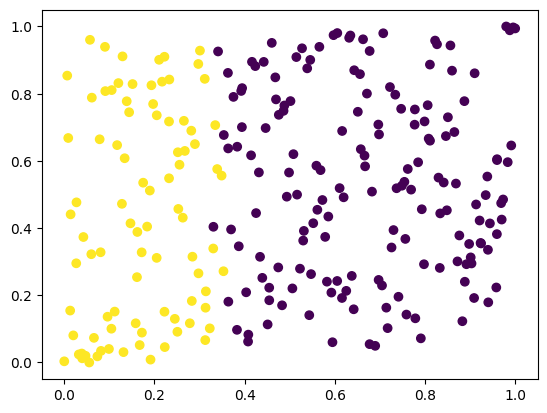

In [91]:
plt.scatter(x_new[:,0], x_new[:, 1], c=y)

In [95]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(x, y).predict(x)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(x)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, x[:, 0].max(), (5000, 1)),
        np.random.uniform(0, x[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

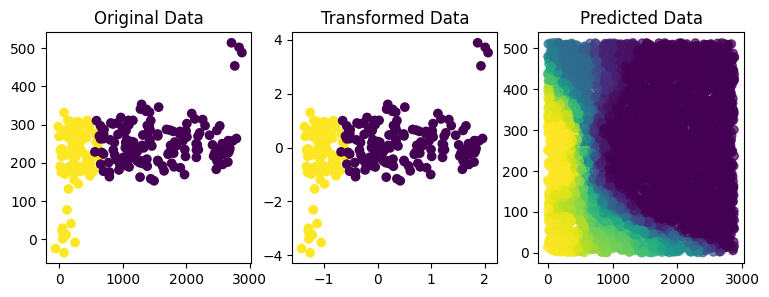

In [96]:
plot_output(scaler = StandardScaler())

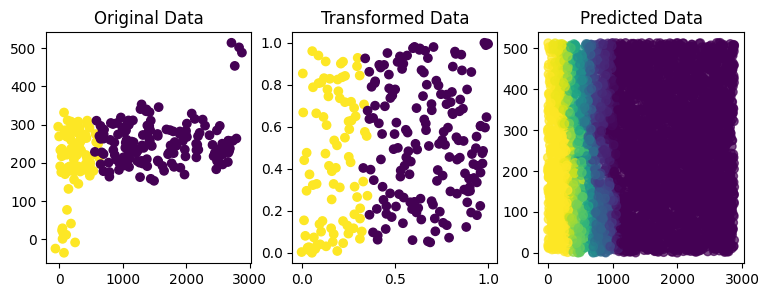

In [97]:
plot_output(scaler =QuantileTransformer(n_quantiles=100))

(array([124., 251., 159., 126.,  85.,  74.,  47.,  37.,  22.,  18.,  12.,
         13.,   7.,   4.,   2.,   3.,   6.,   4.,   2.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.11108359, -0.81858256, -0.52608154, -0.23358051,  0.05892052,
         0.35142154,  0.64392257,  0.9364236 ,  1.22892462,  1.52142565,
         1.81392668,  2.1064277 ,  2.39892873,  2.69142976,  2.98393078,
         3.27643181,  3.56893284,  3.86143386,  4.15393489,  4.44643592,
         4.73893694,  5.03143797,  5.323939  ,  5.61644002,  5.90894105,
         6.20144208,  6.4939431 ,  6.78644413,  7.07894516,  7.37144618,
         7.66394721]),
 <BarContainer object of 30 artists>)

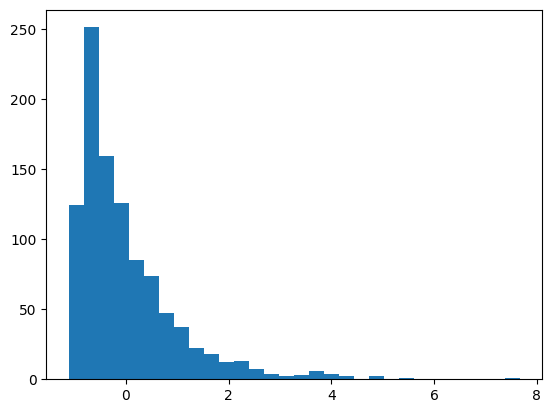

In [24]:
x = np.random.exponential(10, (1000)) + np.random.normal(0, 1, (1000))
plt.hist((x - np.mean(x))/np.std(x), 30)

In [98]:
df = pd.read_csv("/content/drawndata2.csv")

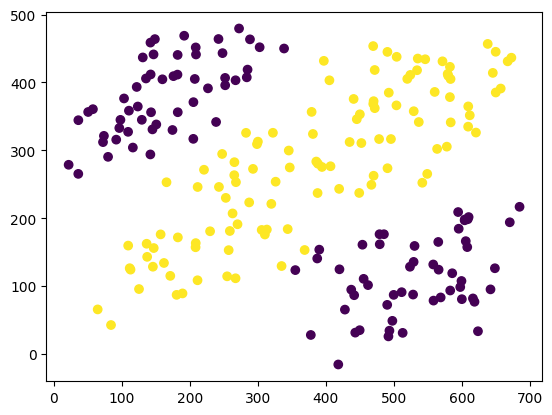

In [99]:
x = df[["x", "y"]].values
y = df["z"] == 'a'
plt.scatter(x[:,0], x[:,1], c=y)

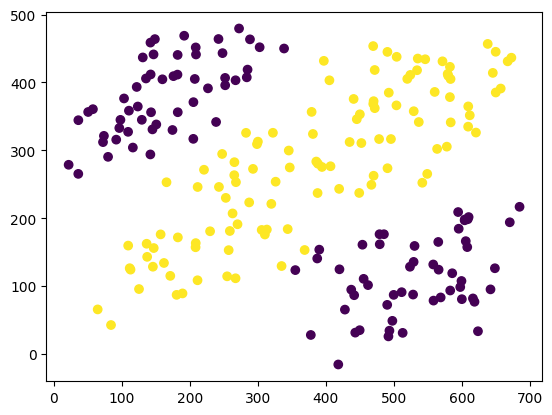

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
        # ("scale", QuantileTransformer(n_quantiles=100)),
         ("scale",PolynomialFeatures()),
         ("model", LogisticRegression())
    ]
)

pred =pipe.fit(x, y).predict(x)
plt.scatter(x[:,0], x[:,1], c=pred)

In [106]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [107]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
enc = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [115]:
enc.transform([["zero"]])

array([[0., 0., 0.]])